In [8]:
import numpy as np
import sounddevice as sd
from scipy.io.wavfile import write, read
import matplotlib.pyplot as plt
import librosa.display

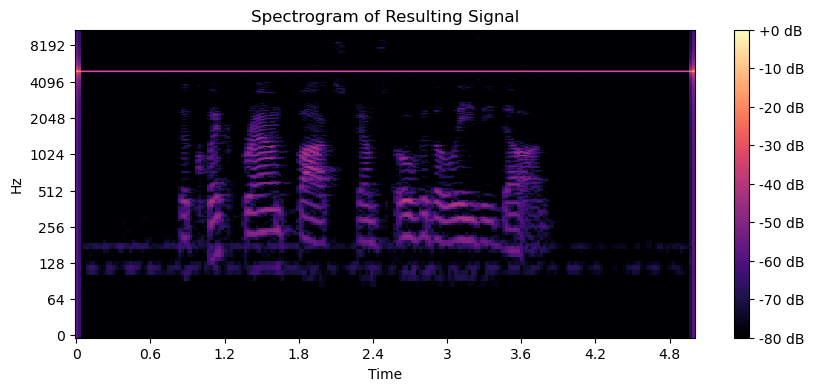

In [9]:
speech_filename = 'TheBrownFox.wav'
speech_sr, speech_data_stereo = read(speech_filename)


speech_data_mono = np.mean(speech_data_stereo, axis=1)


sr = speech_sr
duration = len(speech_data_mono) / sr


t = np.arange(0, duration, 1/sr)
frequency = 5000
sine_wave = np.sin(2 * np.pi * frequency * t)


min_length = min(len(speech_data_mono), len(sine_wave))
speech_data_mono = speech_data_mono[:min_length]
sine_wave = sine_wave[:min_length]


resulting_signal = speech_data_mono + sine_wave


sd.play(resulting_signal, samplerate=sr)
sd.wait()

write(f'CharpPinaWest-speechchirp.wav', sr, resulting_signal.astype(np.int16))

# Plot the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(resulting_signal)), ref=np.max), y_axis='log', x_axis='time', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Resulting Signal')
plt.show()
